#### Multiple Linear Regression on Boston Housing dataset
* Source blog: https://intellipaat.com/blog/what-is-linear-regression/
* Source data: https://github.com/selva86/datasets/blob/master/BostonHousing.csv. Save this data as an excel sheet

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per USD10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. Target variable: y = MEDV - Median value of owner-occupied homes in USD1000's

In [1]:
# Step1: use pandas to import the BostonHouse.xlsx dataset
import pandas as pd
# load excel dataset as a Pandas dataframe
house=pd.read_excel("BostonHousing.xlsx")

# Step2: See top few rows of dataset to check
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
# Step3: Explore the dataframe statistics. Get descriptive statistics
house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
# Step 4: Continue exploring by visualizing correlations between variables using matplotlib
import matplotlib.pyplot as plt

In [4]:
# Draw correlation values with color coding
# Dark colour shows highly correlated values.Blue is positive correlation.
# Light colour shows values that have less correlation. Brown shows negative correlation
correlation = house.corr ()
correlation.style.background_gradient (cmap = 'BrBG')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<AxesSubplot:>

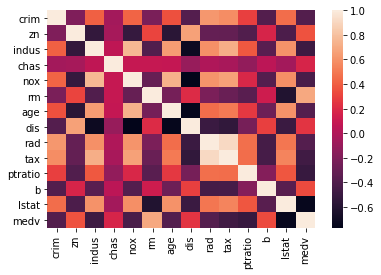

In [5]:
# (Optional) Visualise with a Heat Map which is part of Seaborn library
import seaborn as sns
correlation = house. corr ()  
sns. heatmap (correlation)

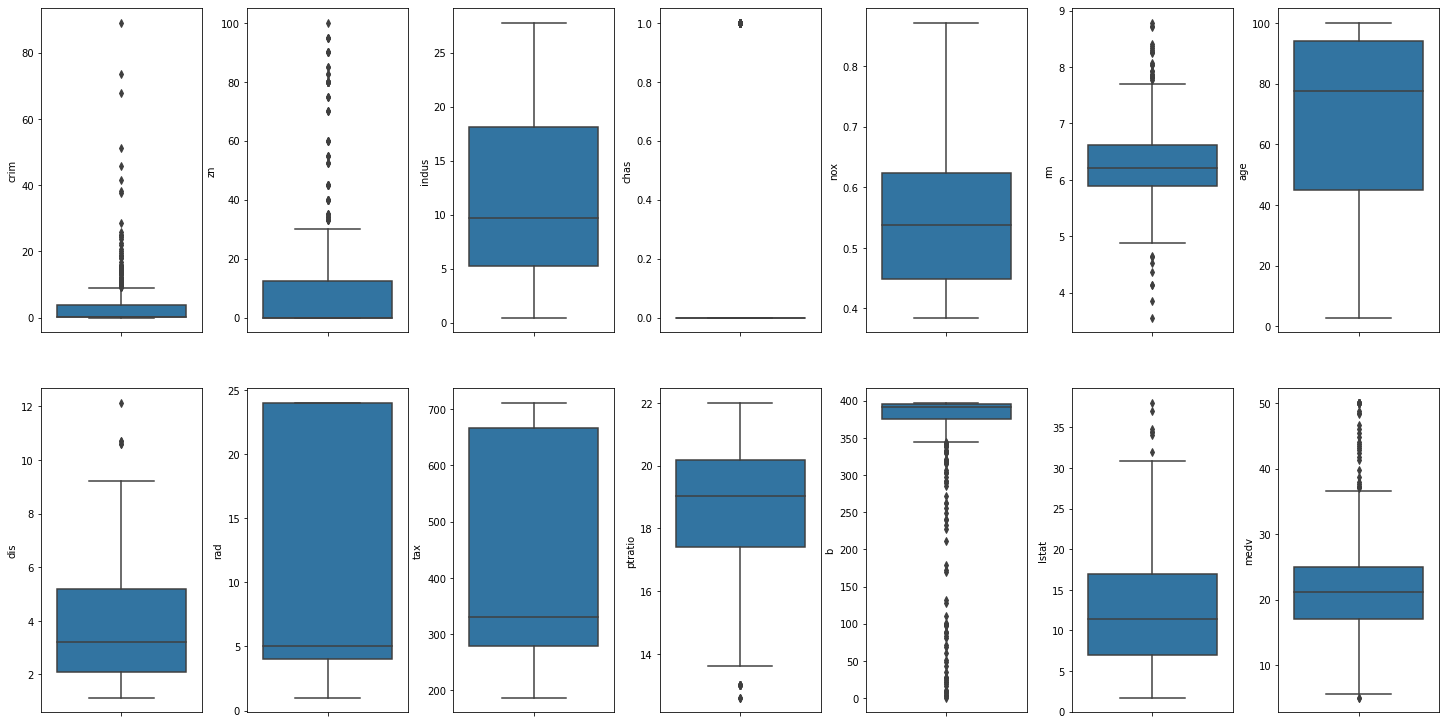

In [6]:
# Optional: Explore the distribution and outliers of datasets using boxplot
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in house.items():
    sns.boxplot(y=k, data=house, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

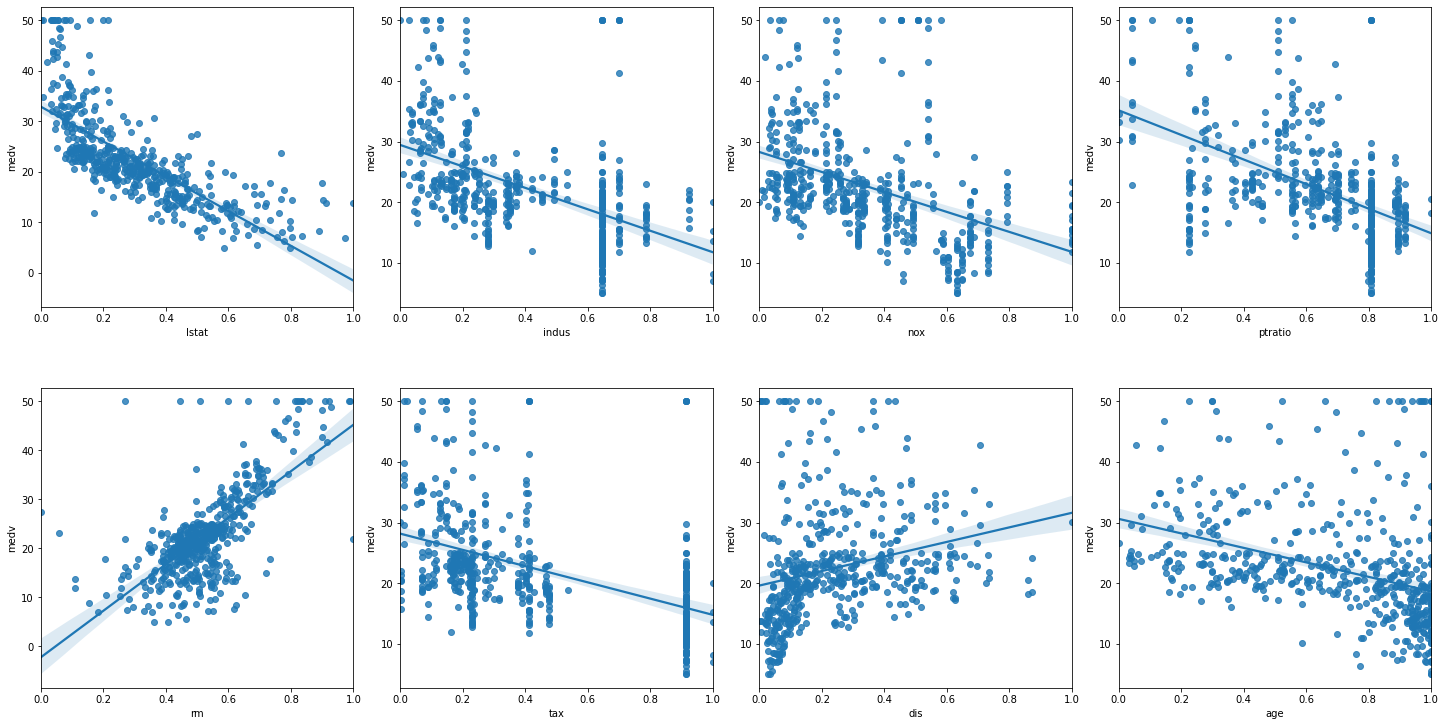

In [7]:
# Optional : Additional visualizations. Check the linear relation of each variable with y
from sklearn import preprocessing

# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age']
x = house.loc[:,column_sels]
y = house['medv']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

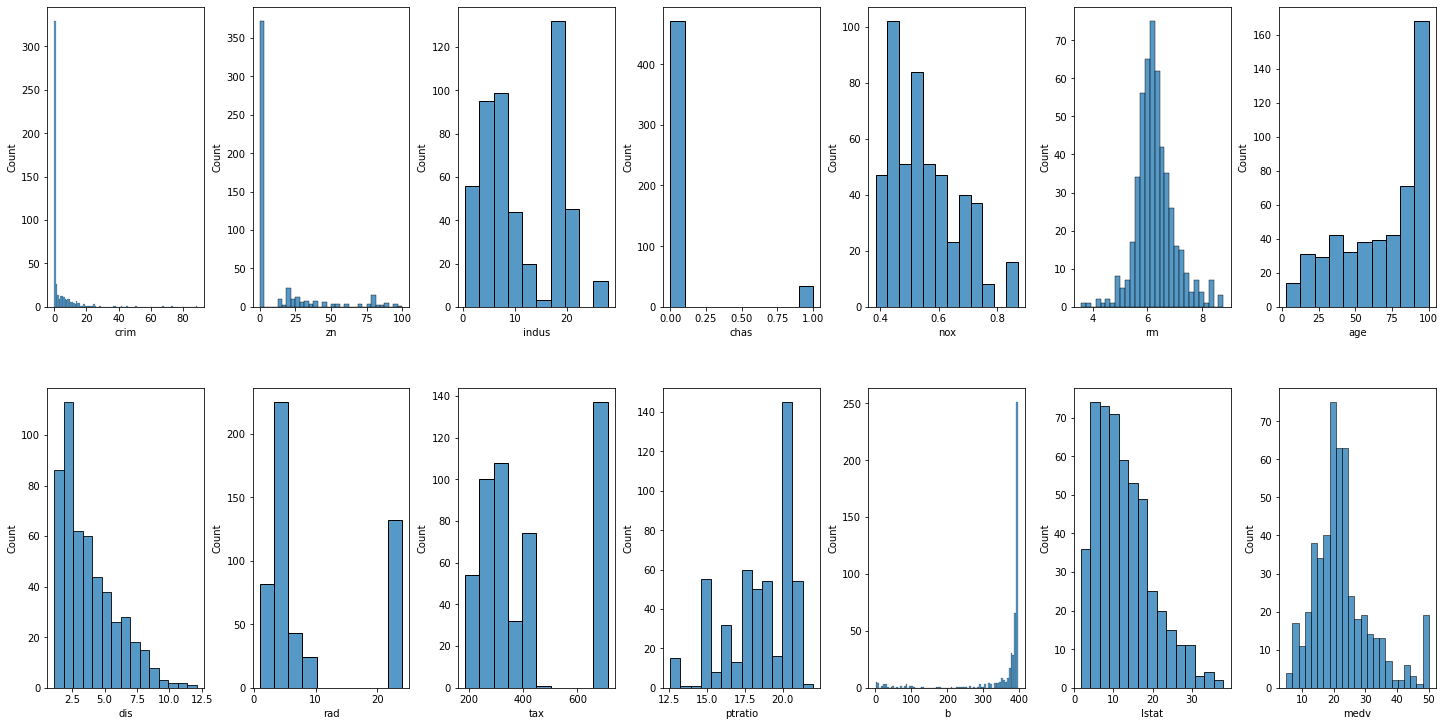

In [8]:
# Optional: Additional exploration of all variables
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in house.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histograms above also shows that columns CRIM, ZN, B have highly skewed distributions. Also medv seems to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).


##### Start Multiple Linear Regression
Assume House value medv is dependant on all the independant variables.

In [12]:
# Step 6: Extract all independant variables into a dataframe x & dependant variable into y

# Use pandas iloc function to choose all rows & all columns except last column of medv
x= pd.DataFrame(house.iloc[:,:-])

# Use pandas iloc function to choose all rows & only last column of medv
y= pd.DataFrame(house.iloc[:,-1])

# Inspect dataframe x
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [13]:
# Inspect dataframe y
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


##### Use the Scikit Learn Library (sklearn)
We will create a training set ie. with 80% of the data to build the model & balance 20% used for testing the model. Randomise the way to select data for training & test.

In [14]:
# Step 7: Create train & test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [15]:
# See the shape ie. Rows x Columns of each train & test dataset
# Remember in the training dataset - both x & y is given to machine to learn the formula
# In the test dataset - only x values are given & machine predicts y with the formula
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [16]:
# Step 8: Train the Linear Regression Algorithm with training set
# Note: we are only passing Crim independant variable - simple linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
# Step 9: Retrieve the slope or coefficient ie. of all independant variables 
# For ease of reading we will have to concatenate & match with the name of the variable
v = pd.DataFrame(regressor.coef_,index=['Coefficient']).transpose()
w = pd.DataFrame(x.columns,columns=['Attribute'])

# Now concatenate dataframes v & w into one single dataframe
coef_df=pd.concat([w,v],axis=1,join='inner')
coef_df

,Attribute,Coefficient
0,crim,-0.130800
1,zn,0.049403
2,indus,0.001095
3,chas,2.705366
4,nox,-15.957050
5,rm,3.413973
6,age,0.001119
7,dis,-1.493081
8,rad,0.364422
9,tax,-0.013172


In [20]:
# So the regression equation is: as per above coefficients for the various independant variables.
# Step 10: Now use above formula to predict the mdev for the 102 test data set.
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred,columns=['Predicted'])
y_pred

,Predicted
0,37.563118
1,32.144451
2,27.065736
3,5.670806
4,35.099826
...,...
97,21.912956
98,22.394774
99,13.193354
100,23.969911


In [21]:
# Step 11: Evaluate the accuracy of the algorithm
# That is calcluate the error of the predicted medv vs. the actual medv of test set.
from sklearn import metrics
import numpy as np
print('Mean Absolute Error: MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error: MSE:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: MAE: 3.21327049584238
Mean Square Error: MSE: 20.86929218377082
Root Mean Square Error:RMSE 4.5682920423032085


* Lower the MAE score the better. So 3.2 is a lower error 6.41 we got from Simple Regression
* Similarly with RMSE (which is easier to interpret than MSE)